# DAT file Smoothing

In [18]:
# import

import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.convolution import convolve, convolve_fft, Box1DKernel
from astropy.convolution import Gaussian1DKernel
from IPython.display import Image
from astropy.io import fits

fig = plt.figure()

import numpy as np
import astropy.io as ap
from decimal import Decimal
matplotlib.rcParams.update({'font.size': 18}) 

def Read(filename):
    file=open(filename, 'r') #open file
    data = np.genfromtxt(filename, dtype=None, names=True) #put data into array. arranged like this in txtfile (DataPoint ANG FLUX BACKFLUX)
    file.close #close the file
    a=np.zeros(len(data)) #make an array of zeros that is the length of data array
    b=np.zeros(len(data))
    c=np.zeros(len(data))

    for i in range(len(data)): #looping over range of length of data array
        a[i]=data[i][0] #assign pixel value of ith data point. Data[i] consists of 4 coloums. second index required to sepcfy desired coloum.
        b[i]=data[i][1] #assign wavelength value of ith data point. addition index of [2] required for third coloum.
        c[i]=data[i][2] #assign flux value of the ith data point. index of [3] for fourth coloum. 
    return a,b,c

def ReadBinN(filename,binsize):
    file=open(filename, 'r') #open file
    data = np.genfromtxt(filename, dtype=None, names=True) #put data into array. arranged like this (DataPoint ANG FLUX BACKFLUX)
    file.close #close the file
    g=np.arange(data[0][0],data[len(data)-1][0],binsize)#create an index for every n data points depending on bin size
    atest=[] #specify array but this time instead of filling with zeros the array will be appended
    btest=[]
    ctest=[]
    stepa=0#create variable to be used as intermediate step to sum the values of data[][]
    stepb=0
    stepc=0
    for b in range(len(g)):#now looping over the length of g depending on the bin size
        for i in range(binsize):#now looping over the binsize. Sums up data points between bin index g 
            if g[b]+i >= 3233.0:
                g[b] = g[b]-i
            stepa+=data[g[b]+i][1] #Sums up pix values but this time up to a designated bin size
            stepb+=data[g[b]+i][2] #wv
#            stepc+=data[g[b]+i][2] #flux
                    
        atest.append(stepa/binsize) #divide by binsize to get average.
        btest.append(stepb/binsize)
#        ctest.append(stepc/binsize) 
        
        stepa=0 #reinitialize stepa and stepb back to 0. dont want previous loop values contributing to next loop
        stepb=0
#        stepc=0

    return atest,btest

<Figure size 640x480 with 0 Axes>

In [19]:
#call files and read in and assign ang/flux values

#change bin size
n=4 #bin size

wv,flux,nan= Read('/Users/neelsharma/Desktop/ASTRProjects/J08_1ds/l3c_4446001001_03103_s00002_00007_x1d_optimal_flam.dat')
print(wv)
print(flux)

[16999.069958 17009.779449 17020.488935 ... 31484.285905 31494.956564
 31505.627176]
[0.223042 0.216337 0.210922 ... 0.200117 0.199099 0.194513]


# No binning, and binning


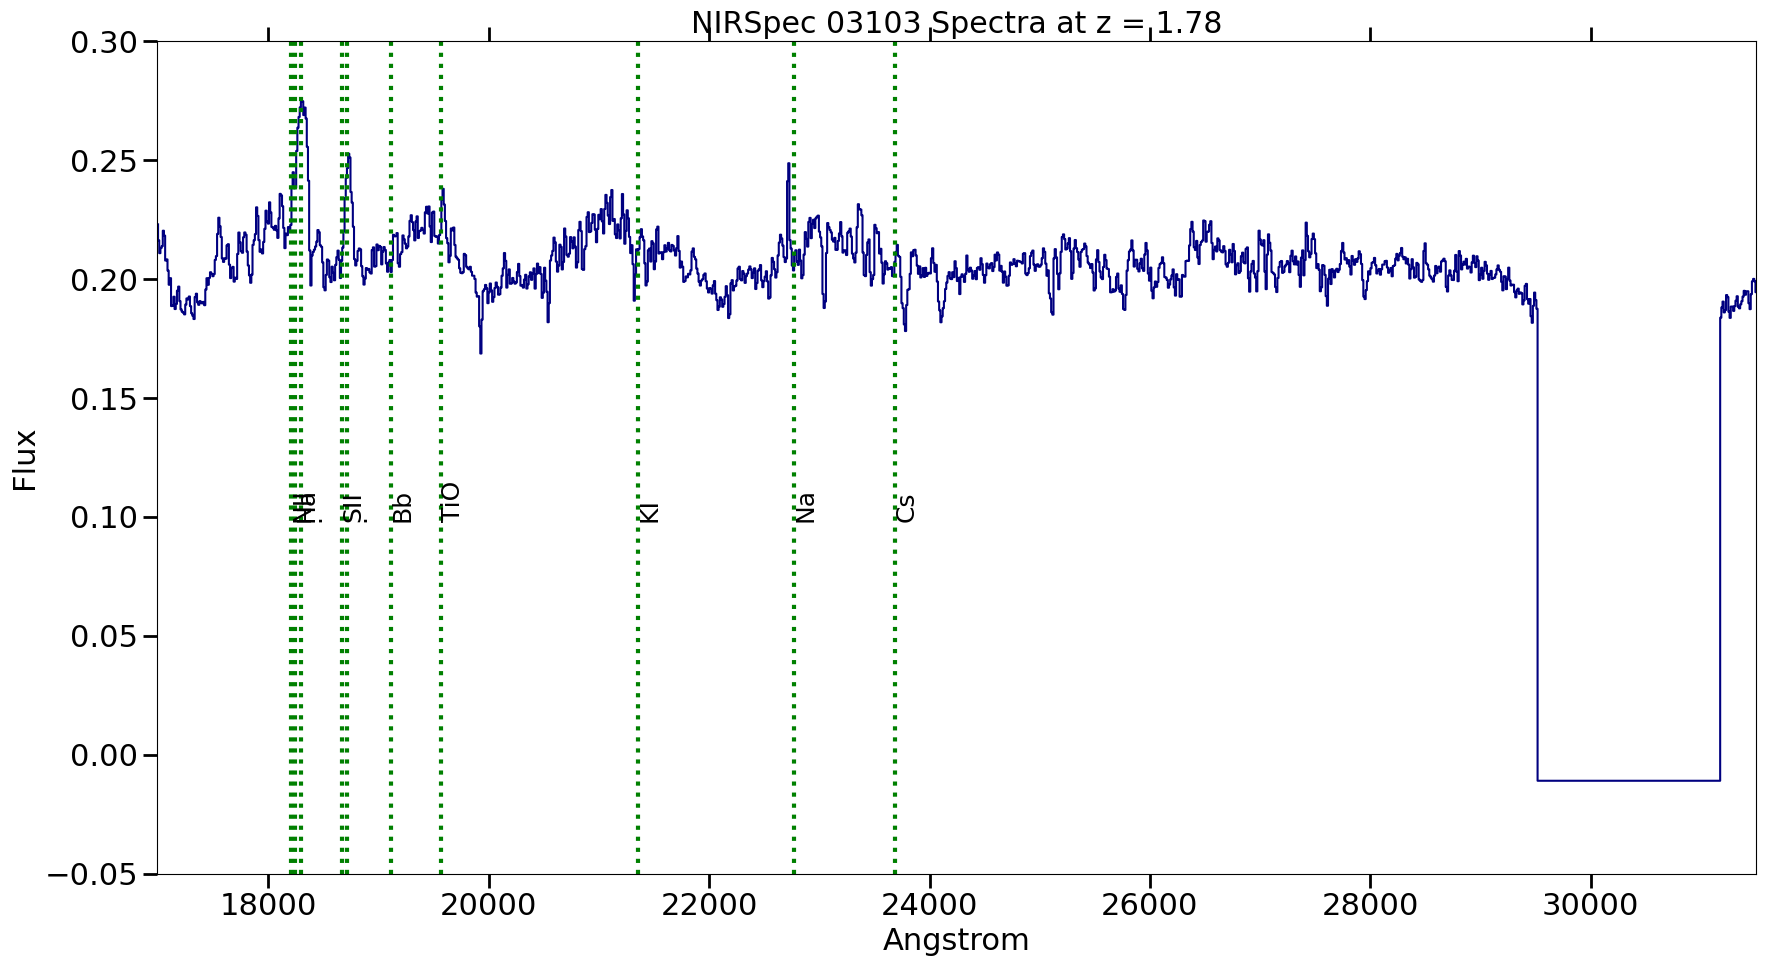

In [20]:
fig, axs = plt.subplots(1, sharex=True, figsize=(18,10)) 
#fig, axs = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': [3,1],'hspace':0}, figsize=(15,8)) 
#plot Ang vs Flux. use drawstyle='steps' to make it have flat tops between data points (helps distinguish better)

axs.plot(wv, flux, drawstyle='steps', color='navy')
lwave = [912,1026,1215.67,1240,1260,1296.3,1323.9,1302,1304,1335,\
         1343.354,1394,1403,1417.237,1427.85,1501.76,1527,1548,1550,1608,\
         1640,1671,1855,1863,1909,2326,2344,2374,2424,2587,\
         2600,2796,2799,3346,3426,3727,3798,3835,3889,3933,3968,\
         3970,4102,4304,4340,4861,4959,5007,5167,5173,5184,\
         5876,5889,5896,6548,6563,6583,6716,6730,6875,7040,\
         7680,8190,8520]
lname = ['Lylim','Lyb','Lya','NV','SiII','CIII/SiIII','CII/NIII','SiII/OI',' ','CII',\
         'OIV','SiIV',' ','SiIII','CIII','SV','SiII','CIV',' ','FeII', \
         'HeII','AlII','AlIII','.','CIII','CII','FeII','FeII','NeIV','FeII',\
         '.','MgII',' ','NeV','NeV','[OII]','Hth','Heta','Hz','K','H,Hep',\
         ' ','Hd','Gb','Hg','Hb','[OIII]','[OIII]',' ','MgI',' ',\
         'HeI,NaD','.','.','NII','Ha','.','SII','.','Bb','TiO',\
         'KI','Na','Cs']
#-----------------
# Input parameters
#-----------------
axs.set_xlim(16990,31500) #wavelength bounds #16990 #31500
#axs.set_xlim(4500,6050) #wavelength bounds

axs.set_ylim(-0.05,0.30) #flux bounds
yann = 0
yann2 =0
xoffs = 5
zed = 1.78
#zed = 0.3477
#-----------------

plt.title('NIRSpec 03103 Spectra at z = '+str(zed))

lrun = len(lwave)
for i in range(lrun):
    tmpwl = lwave[i]*(1+zed)
    axs.axvline(x=tmpwl, color='green',lw=3,ls=':')
    axs.annotate(lname[i],(tmpwl,yann),xytext=(tmpwl-xoffs,0.1),rotation=90,clip_on=True)

axs.axvline(x=7600, color='green',lw=3,ls=':')
axs.annotate('Ab',(7600,yann2),xytext=(7600-xoffs,0.1),rotation=90,clip_on=True)
axs.axvline(x=6875, color='green',lw=3,ls=':')
axs.annotate('Bb',(6875,yann2),xytext=(6875-xoffs,0.1),rotation=90,clip_on=True)

#get tick marks on bottom of the top subplot to make visualization easier
axs.tick_params(labelbottom=True)
#plt.xticks(np.arange(min(wv), max(wv)+1, 10.0))
# Add axis labels
plt.xlabel('Angstrom', fontsize=22)
axs.set_ylabel('Flux', fontsize=22)
#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
axs.tick_params(top=True, length=10,width=2)
plt.tight_layout()
plt.show()


In [21]:
#call files and read in and assign ang/flux values

#change bin size
n=4 #bin size

wv, flux, nan= Read('/Users/neelsharma/Desktop/ASTRProjects/J08_1ds/l3c_4446001001_03101_s00002_00007_x1d_optimal_flam.dat')
print(wv)
print(flux)

[ 9800.441175  9806.826277  9813.211378 ... 18788.029427 18794.391342
 18800.753228]
[0.03056  0.026158 0.032296 ... 0.192568 0.194702 0.195282]


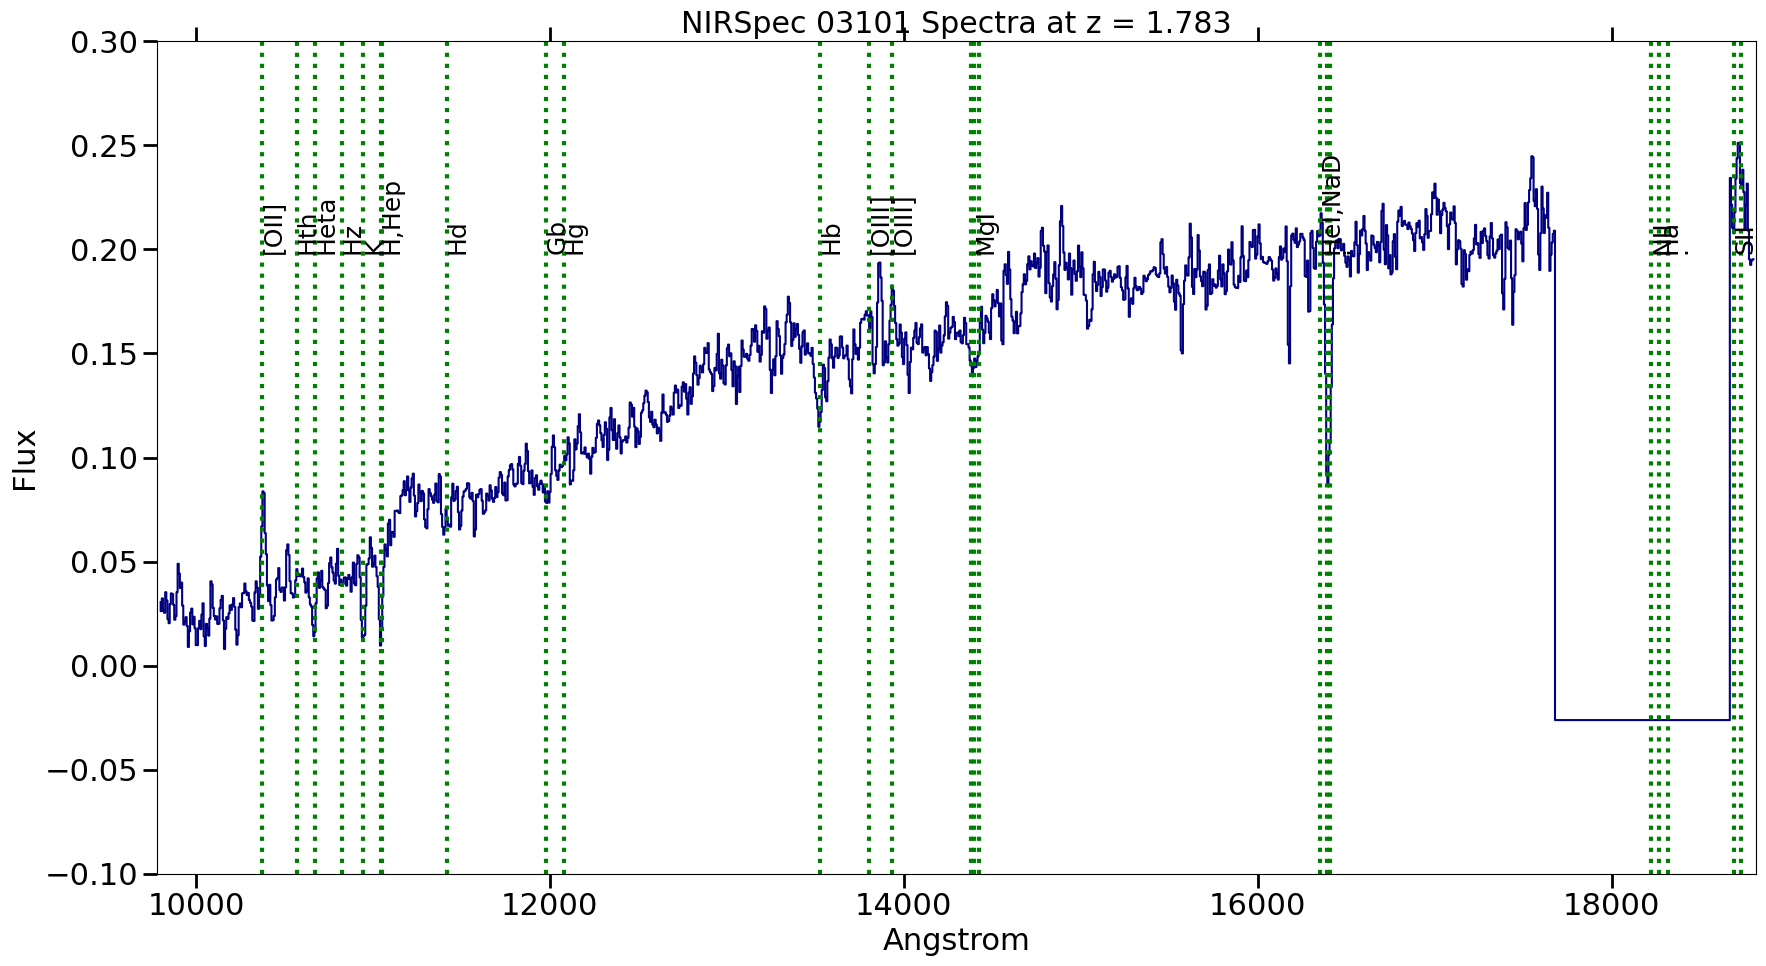

In [22]:
fig, axs = plt.subplots(1, sharex=True, figsize=(18,10)) 
#fig, axs = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': [3,1],'hspace':0}, figsize=(15,8)) 
#plot Ang vs Flux. use drawstyle='steps' to make it have flat tops between data points (helps distinguish better)

axs.plot(wv, flux, drawstyle='steps', color='navy')
lwave = [912,1026,1215.67,1240,1260,1296.3,1323.9,1302,1304,1335,\
         1343.354,1394,1403,1417.237,1427.85,1501.76,1527,1548,1550,1608,\
         1640,1671,1855,1863,1909,2326,2344,2374,2424,2587,\
         2600,2796,2799,3346,3426,3727,3798,3835,3889,3933,3968,\
         3970,4102,4304,4340,4861,4959,5007,5167,5173,5184,\
         5876,5889,5896,6548,6563,6583,6716,6730,6875,7040,\
         7680,8190,8520]
lname = ['Lylim','Lyb','Lya','NV','SiII','CIII/SiIII','CII/NIII','SiII/OI',' ','CII',\
         'OIV','SiIV',' ','SiIII','CIII','SV','SiII','CIV',' ','FeII', \
         'HeII','AlII','AlIII','.','CIII','CII','FeII','FeII','NeIV','FeII',\
         '.','MgII',' ','NeV','NeV','[OII]','Hth','Heta','Hz','K','H,Hep',\
         ' ','Hd','Gb','Hg','Hb','[OIII]','[OIII]',' ','MgI',' ',\
         'HeI,NaD','.','.','NII','Ha','.','SII','.','Bb','TiO',\
         'KI','Na','Cs']
#-----------------
# Input parameters
#-----------------
axs.set_xlim(9780,18815) #wavelength bounds
#axs.set_xlim(4500,6050) #wavelength bounds

axs.set_ylim(-0.1,0.3) #flux bounds
yann = 0
yann2 =0
xoffs = 5
zed = 1.783
#zed = 0.3477
#-----------------

plt.title('NIRSpec 03101 Spectra at z = '+str(zed))

lrun = len(lwave)
for i in range(lrun):
    tmpwl = lwave[i]*(1+zed)
    axs.axvline(x=tmpwl, color='green',lw=3,ls=':')
    axs.annotate(lname[i],(tmpwl,yann),xytext=(tmpwl-xoffs,0.2),rotation=90,clip_on=True)

axs.axvline(x=7600, color='green',lw=3,ls=':')
axs.annotate('Ab',(7600,yann2),xytext=(7600-xoffs,0.2),rotation=90,clip_on=True)
axs.axvline(x=6875, color='green',lw=3,ls=':')
axs.annotate('Bb',(6875,yann2),xytext=(6875-xoffs,0.2),rotation=90,clip_on=True)

#get tick marks on bottom of the top subplot to make visualization easier
axs.tick_params(labelbottom=True)
#plt.xticks(np.arange(min(wv), max(wv)+1, 10.0))
# Add axis labels
plt.xlabel('Angstrom', fontsize=22)
axs.set_ylabel('Flux', fontsize=22)
#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
axs.tick_params(top=True, length=10,width=2)
plt.tight_layout()
plt.show()